# T-distributed Stochastic Neighbor Embedding

T-SNE is a machine learning algorithm for visualization. It takes high dimensionality data and compresses it down to a lower, but more managable set of data dimensions. 

### When To Use
* Want to reduce variables
* Ensure variable independence
* Will change independent variables, changing how the data is visualized. This may or may not be a good thing
* provides early insight on the dataset
* This algorithm can be useful when a dataset is very large and complex. In exchange for lost data, the algorithm that will used the compressed data to compute faster
* Handles non-linear data effeciently
* Preserves local and global structures
<br>

### How Does it Work
* Calculates the probability of similarity of points in high-dimensional space and calculating the probability of similarity of points in the corresponding low-dimensional space. Neigbors are chosen by a Gaussian 
* Minimize the difference between these conditional probabilitiesin higher-dimensional and lower-dimensional space
* Minimization is measured thorugh minimized sum of Kullback-Leibler divergence of data points using a gradient descent method.
<br>

### Results 
* The algorithm will compress the higer dimension data and breaks it down to  components
<br>


### Limitations
* Captures local relationships
* Complex Manifolds in the data
* Hyperparameter tuning
* Noisy Patterns
* Probabilistically Determined --> Non-Deterministic
* Very computation heavy. It may be advised to use PCA or other dimension reduction techniques as a intermediary before using t-SNE, especially if the data is sparse
* Function scales quadratically with number of objects and memory requirements also grow

## IRIS Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# loading dataset into Pandas DataFrame
df = pd.read_csv(url
                 , names=['sepal length','sepal width','petal length','petal width','target'])

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#We have labeled data. So let us remove the target and keep only the features
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
x[0:5] #It is now a numpy array that houses all the data from the dataframe

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
y = df.loc[:,['target']].values # Let us keep the labels as well

In [9]:
#Scaling the data with a mean of 0 and a variance of 1
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [11]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.868185
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.417557
[t-SNE] KL divergence after 300 iterations: 0.123171


In [18]:
principalDf = pd.DataFrame(data = tsne_results
             , columns = ['tsne-2d-one', 'tsne-2d-two'])
principalDf.head(5) 
#This shows we have two different dimensionality. Notice how the data isn't clear

,tsne-2d-one,tsne-2d-two
0,-8.265788,9.492775
1,-8.745642,7.314662
2,-9.258138,8.281825
3,-9.395688,7.814572
4,-8.525172,9.878574


In [19]:
#Since we know the original labels, we could see how the data has changed
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

,tsne-2d-one,tsne-2d-two,target
0,-8.265788,9.492775,Iris-setosa
1,-8.745642,7.314662,Iris-setosa
2,-9.258138,8.281825,Iris-setosa
3,-9.395688,7.814572,Iris-setosa
4,-8.525172,9.878574,Iris-setosa


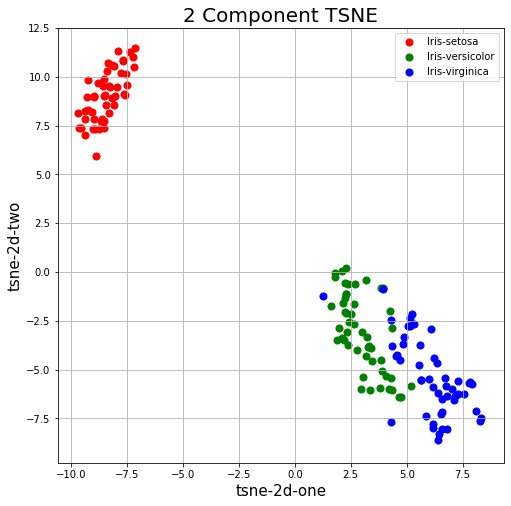

In [20]:
#Graph Visualization
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne-2d-one', fontsize = 15)
ax.set_ylabel('tsne-2d-two', fontsize = 15)
ax.set_title('2 Component TSNE', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'tsne-2d-one']
               , finalDf.loc[indicesToKeep, 'tsne-2d-two']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## MINST Dataset

Classes: 10  <br/>
Samples: 7000 per class <br/>
Sample Total: 70000 <br/>
Dimensionality: 784 pixels = 28 x 28 x 1 <br/>
Features: Greyscale 0-255 integer values <br/>


In [1]:
import numpy as np
import time
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
X = mnist.data / 255.0
y = mnist.target
print("Shape", X.shape)
print("Target", y.shape)

Shape (70000, 784)
Target (70000,)


In [4]:
#Create a Dataframe for easy use
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
print('Size of the dataframe: {}'.format(df.shape))
df.head()

Size of the dataframe: (70000, 786)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,9


In [5]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

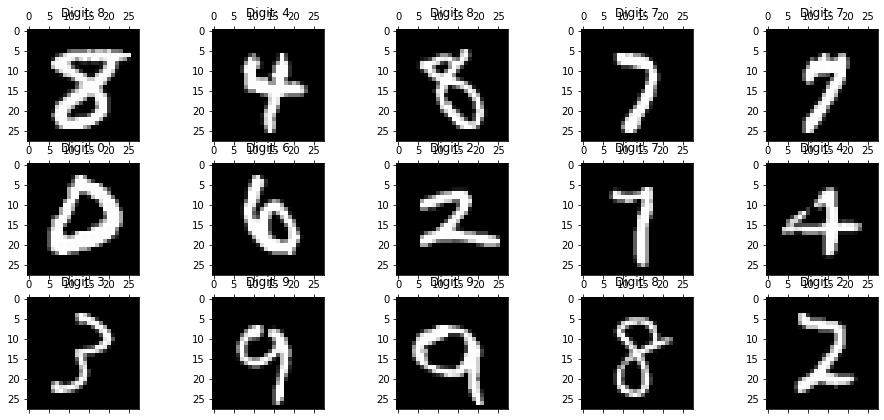

In [6]:
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [7]:
#Let Us only use the first N samples of MNIST because TSNE is heavy program
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values


In [34]:
#Let us use three dimensions
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)

In [35]:
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print("Component Break Down")
print(format(pca.explained_variance_ratio_))
print("Variance Lost: ", 1-sum(pca.explained_variance_ratio_))

Component Break Down
[0.09819946 0.07123677 0.06113222]
Variance Lost:  0.769431553035213


In [37]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.671s...
[t-SNE] Computed neighbors for 10000 samples in 127.542s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.117975
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.684036
[t-SNE] KL divergence after 300 iterations: 2.805240
t-SNE done! Time elapse

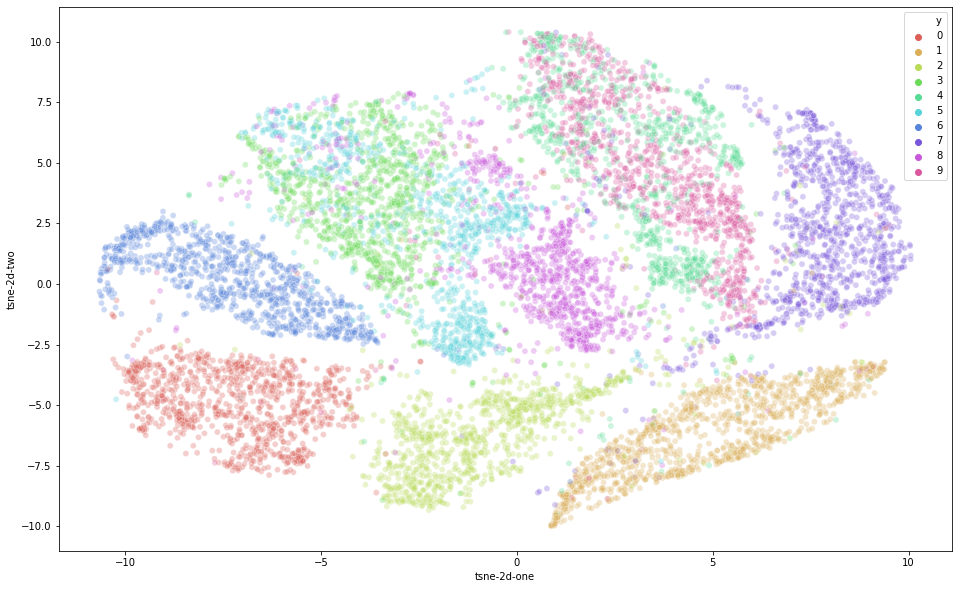

In [38]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

In [10]:
#Doing this on a PCA preclean
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)


In [11]:
print("Component Break Down")
print(format(pca_50.explained_variance_ratio_))
print("Variance Lost: ", 1-sum(pca_50.explained_variance_ratio_))

Component Break Down
[0.09819946 0.07123677 0.06113222 0.05389196 0.04860683 0.04259303
 0.03336665 0.02922305 0.02782974 0.02376468 0.02092971 0.02011264
 0.01713892 0.01673122 0.0158643  0.01506206 0.01349786 0.01282187
 0.01179064 0.0114258  0.01049817 0.01019853 0.00985808 0.00925184
 0.00884266 0.00840735 0.00811475 0.00784379 0.0074114  0.00697318
 0.00654101 0.00647042 0.00603238 0.00583636 0.00555374 0.0053884
 0.0050667  0.00483524 0.00480203 0.0047608  0.00452803 0.0044108
 0.00413577 0.00398268 0.00381759 0.0037444  0.0035984  0.00345232
 0.00336061 0.00319233]
Variance Lost:  0.17387080174192437


In [18]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.028s...
[t-SNE] Computed neighbors for 10000 samples in 10.125s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.829879
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.644478
[t-SNE] KL divergence after 300 iterations: 2.773002
t-SNE done! Time elapsed

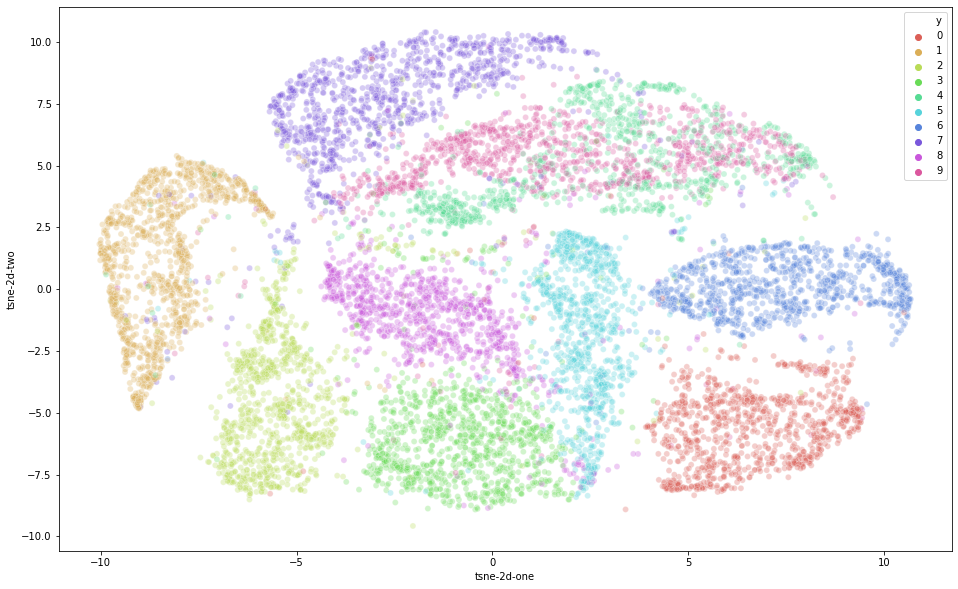

In [19]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)